# 全国新型コロナウイルスデータ



## jsonデータを読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

pcr = pd.read_csv('./PCR.csv')
data = pd.read_csv('./COVID-19.csv')
data_pcr = pd.merge(pcr, data, right_on='確定日',left_on='年月日')
data.head()

,通し,厚労省NO,無症状病原体保有者,国内,チャーター便,年代,性別,確定日,発症日,受診都道府県,...,居住都道府県コード,更新日時,Field2,Field4,Field5,Field6,Field7,Field8,Field9,Field10
0,1,1,NaN,A-1,NaN,30,男性,1/15/2020,1/3/2020,神奈川県,...,14.0,3/29/2020 00:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,A-2,NaN,40,男性,1/24/2020,1/14/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,A-3,NaN,30,女性,1/25/2020,1/21/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NaN,A-4,NaN,40,男性,1/26/2020,1/23/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,NaN,A-5,NaN,40,男性,1/28/2020,1/22/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 50 columns):
通し                  1722 non-null int64
厚労省NO               1491 non-null object
無症状病原体保有者           131 non-null object
国内                  302 non-null object
チャーター便              11 non-null object
年代                  1722 non-null object
性別                  1722 non-null object
確定日                 1722 non-null object
発症日                 1253 non-null object
受診都道府県              1722 non-null object
居住都道府県              1722 non-null object
居住管内                90 non-null object
居住市区町村              1009 non-null object
キー                  1722 non-null object
発表                  1722 non-null object
都道府県内症例番号           1124 non-null object
ステータス               91 non-null object
備考                  379 non-null object
ソース                 1320 non-null object
ソース2                1456 non-null object
ソース3                331 non-null object
人数                  1721 non-null float64
累

## 症状別累計人数

In [3]:
total = data["累計"].iloc[-1]
d = data["死者合計"].dropna().iloc[-1]
di = data["退院数累計"].dropna().iloc[-1]
print(data["確定日"].iloc[-1],"現在データ")
print('全国の新型コロナウイルス感染者はトータル:',total,'死者合計:',d,'累計退院者数:',di)
print('死亡確率：{}%'.format((d/total)*100),'退院率：{}%'.format((di/total)*100))

3/28/2020 現在データ
全国の新型コロナウイルス感染者はトータル: 1722.0 死者合計: 49.0 累計退院者数: 404.0
死亡確率：2.8455284552845526% 退院率：23.461091753774678%


## 日別PCR検査数
厚生労働省の発表資料より

PCR検査数は毎日更新ではありません。

厚生労働省が更新するたびに多少過去の数値が変更されたりしています。

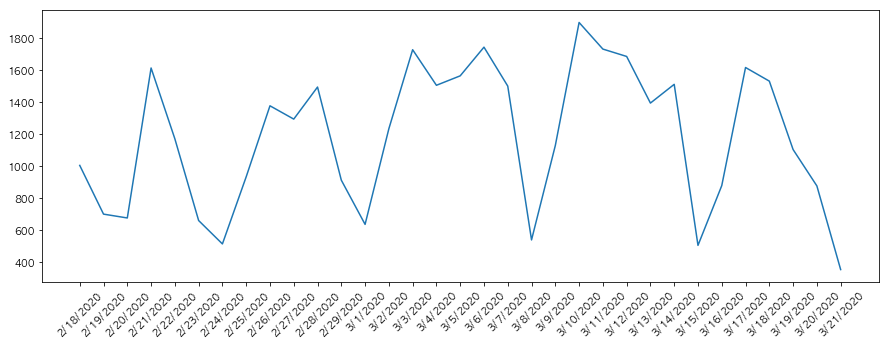

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pcr['年月日'],pcr['数'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

## 累計PCR検査数

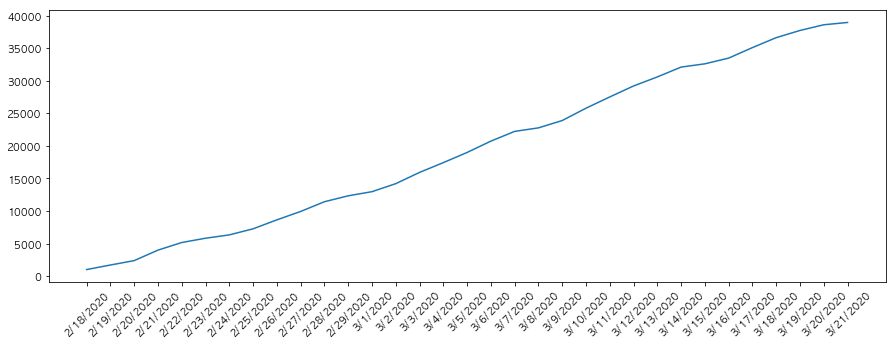

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pcr['年月日'],pcr['PCR累計'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

## 日別感染者累計

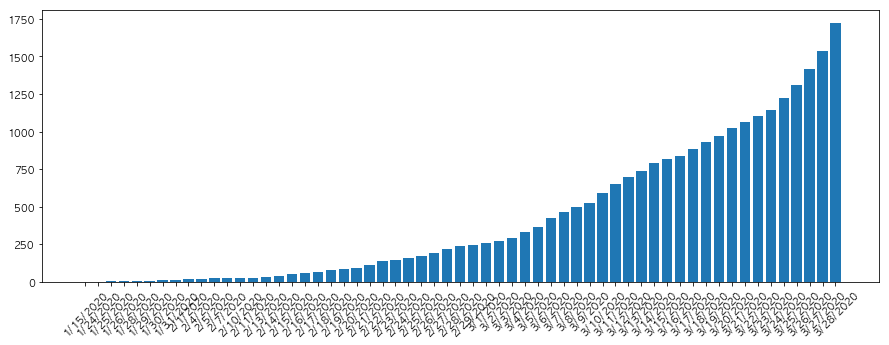

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(data['確定日'],data['累計'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);


## 死亡者推移

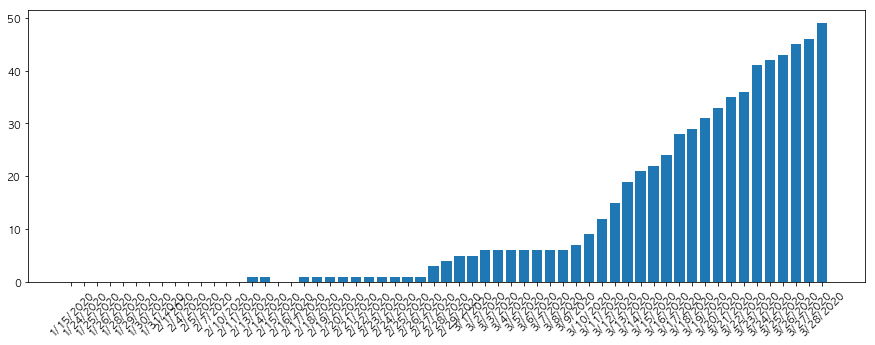

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(data['確定日'],data["死者合計"])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

## 年代別感染者数割合

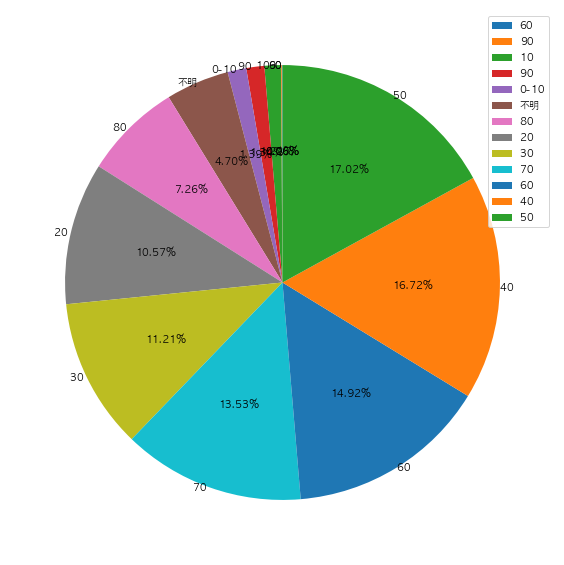

In [8]:
x = data['年代'].value_counts(ascending=True)
label_index = data['年代'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

## 性別感染者数割合

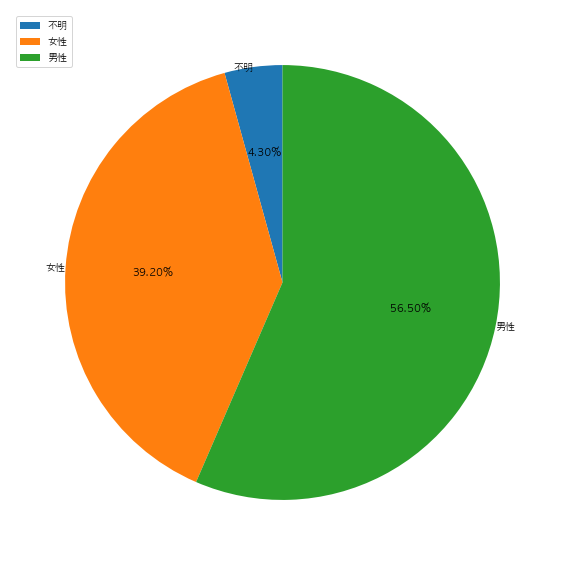

In [9]:
x = data['性別'].value_counts(ascending=True)
label_index = data['性別'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

### 県別累計データ

In [10]:
grouped = data['人数'].groupby(data['居住都道府県'])
total_pref = grouped.sum()
total_pref = total_pref.sort_values(ascending=False) 
total_pref = pd.DataFrame(total_pref)
total_pref

,人数
居住都道府県,
東京都,349.0
大阪府,193.0
北海道,168.0
愛知県,160.0
兵庫県,126.0
神奈川県,117.0
千葉県,116.0
埼玉県,88.0
不明,45.0


In [11]:
location_data = pd.read_csv('./location.csv')
location_data.head()

,都道府県名,緯度,経度
0,北海道,43.06417,141.34694
1,青森県,40.82444,140.74000
2,岩手県,39.70361,141.15250
3,宮城県,38.26889,140.87194
4,秋田県,39.71861,140.10250


### locationデータと感染者数をマージ

In [12]:
pref_data = pd.merge(total_pref, location_data, left_on='居住都道府県', right_on='都道府県名', how='outer')
pref_data['人数'] = pref_data['人数'].fillna(0)
pref_data = pref_data.dropna(subset=['都道府県名'])
pref_data

,人数,都道府県名,緯度,経度
0,349.0,東京都,35.68944,139.69167
1,193.0,大阪府,34.68639,135.52000
2,168.0,北海道,43.06417,141.34694
3,160.0,愛知県,35.18028,136.90667
4,126.0,兵庫県,34.69139,135.18306
5,117.0,神奈川県,35.44778,139.64250
6,116.0,千葉県,35.60472,140.12333
7,88.0,埼玉県,35.85694,139.64889
9,37.0,京都府,35.02139,135.75556
10,30.0,新潟県,37.90222,139.02361


In [13]:
pref_data_dic = pref_data.to_dict(orient='index')
states = tuple(pref_data_dic.values())

## 県別感染者数Map表示
Map表示はGitHubではできませんので、次のリンクから確認ください。

[県別感染者数Map](https://haidoro.github.io/covid_japan/)

In [14]:
import folium
from folium.plugins import HeatMap

map_ = folium.Map(location=[35.684479, 139.747977], zoom_start=5)


# 円の大きさをわかりやすくするための重み
WEIGHT = 0.01

for state in states:
    folium.CircleMarker(
            [state['緯度'], state['経度']],
            radius=state['人数'] + WEIGHT,
            popup=state['都道府県名'],
            color='#3186cc',
            fill_color='#3186cc',
    ).add_to(map_)


map_.save('index.html')
map_
